# House Grade Prediction
# The problem statement and description of the dataset:
## House Grade Prediction
Find The Best House: The 1234ABC Realtors Limited is in great losses due to the automation in the industry and the new innovations and players in the real estate market. So they have hired a Data Science Team to give them a business solution so as to help regain their place in the market. In order to do that, the group thought of a compiled way of grading the houses in order from A to E with respect to different aspects in mind. This would help them to rate the houses as well as different areas as well. So gear up and help the realtors get back their place in the market.

## Objective of the problem: 
The objective of the problem is to predict values “Grade” attribute from the given features of the Test data. Please view the sample submission file to understand how the submission file is to be written. Please upload the submission file to get a score.

1. The predictions are to be written to a CSV file along with ID which is the unique identifier for each tuple.
2. Please upload the submission file to get a score.
3. Please note that the training data is only for creating your data model and all predictions are to be made as per serial numbers on the test file.

## Description of files: -
1. Training File: All features including the target would be present in this file. The machine learning model would trained using this file. This file is to be used for training and validation.
2. Test File: This file contains all features, but the target variable. Prediction is to be made for all tuples in the test file. The predicted values are to be written to a CSV file along with the ID and uploaded.
3. Sample Submission: Sample submission is an example of how the actual submission file should be like.

# Description of the data attributes is as below:
| **Variable Name** | **Description** |
|--|--|
|Area(total) | Total area of the plot.|
|Trooms | Total Number of rooms in the house.|
|Nbedrooms | Number of bedrooms in the house.|
|Nbwashrooms | Number of washrooms attached to the bedroom.|
|Twashrooms | total number of washrooms in the house.|
|Roof |Does the house has roof(yes or no).|
|Roof(Area)|Total area of the terrace.|
|Lawn(Area)| Area of the lawn including garden and parking.|
|Nfloor| Number of floors in the house.|
|API | Air purity index API is in percentage for example if API is 85 it means it's 85% of the standard API for the city.|
|ANB| Amenities nearby amenities like hospitals, parks, multiplex, malls, etc within 2 miles.|
|Expected price| price expected by seller.|
|Grade| Grade provided by a company that depends on the condition and other features mentioned in the data. (Note A is best grade and E is worst.)|

# Evaluation metric: 
## The Evaluation metrics are used to assess the performance of a classification model by comparing its predictions against the actual true values.
1. Accuracy: Accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of predictions made.

In [1]:
import io
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%cd "D:\imarticus learning\hackaton"


D:\imarticus learning\hackaton


In [2]:
# to read the CSV file
grade_tr=pd.read_csv("TRAINING_.csv")

In [3]:
grade_tt=pd.read_csv("TEST_.csv")

In [4]:
# head() function is access or to show the row and columns in the file
# by deafault head() gives first 5 rows
grade_tr.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [5]:
# tail() function is access or to show the row and columns in the file
# by deafault tail() gives first 5 rows
grade_tr.tail()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
6995,6996,306,8.0,2.0,1.0,3.0,NaN,NaN,78.0,1,73.0,5,D,3717$
6996,6997,341,5.0,3.0,2.0,4.0,YES,100.0,72.0,4,76.0,4,D,3339$
6997,6998,306,6.0,4.0,2.0,4.0,yes,83.0,80.0,4,96.0,4,D,3829$
6998,6999,338,8.0,7.0,6.0,7.0,NO,0.0,95.0,4,84.0,1,B,4488$
6999,7000,314,5.0,6.0,4.0,6.0,yes,109.0,80.0,4,96.0,2,C,3418$


In [6]:
# to fetch the total number of (rows,columns)
grade_tr.shape

(7000, 14)

In [7]:
# Descriptive statistics
grade_tr.describe()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB
count,7000.000000,7000.000000,6998.000000,6997.000000,6998.000000,6999.000000,5647.000000,6998.000000,7000.000000,6999.000000,7000.000000
mean,3500.500000,325.225571,7.012146,4.992568,4.004716,5.501357,47.202763,89.957988,4.509429,78.975711,3.494714
std,2020.870275,20.550583,1.420061,1.653418,1.596984,1.509129,48.806472,11.812719,1.831187,11.852443,1.700449
min,1.000000,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000
25%,1750.750000,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000
50%,3500.500000,326.000000,7.000000,5.000000,4.000000,5.000000,0.000000,90.000000,5.000000,79.000000,3.000000
75%,5250.250000,343.000000,8.000000,6.000000,5.000000,7.000000,95.000000,100.000000,6.000000,89.000000,5.000000
max,7000.000000,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000


In [8]:
#info() is used to get the total information about the file like no of rows and columns
grade_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        6998 non-null   float64
 3   Nbedrooms    6997 non-null   float64
 4   Nbwashrooms  6998 non-null   float64
 5   Twashrooms   6999 non-null   float64
 6   roof         5647 non-null   object 
 7   Roof(Area)   5647 non-null   float64
 8   Lawn(Area)   6998 non-null   float64
 9   Nfloors      7000 non-null   int64  
 10  API          6999 non-null   float64
 11  ANB          7000 non-null   int64  
 12  Grade        7000 non-null   object 
 13  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 765.8+ KB


In [9]:
grade_tt.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$


In [10]:
grade_tt.tail()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
3294,3295,349,7.0,3.0,3.0,4,NaN,NaN,100.0,5,89.0,4,3858$
3295,3296,338,7.0,3.0,2.0,4,NO,0.0,87.0,3,75.0,6,3714$
3296,3297,307,8.0,4.0,5.0,6,yes,88.0,88.0,4,83.0,6,3824$
3297,3298,352,5.0,3.0,4.0,5,YES,88.0,100.0,2,99.0,4,3533$
3298,3299,329,5.0,3.0,1.0,3,yes,82.0,83.0,3,97.0,5,3404$


In [11]:
grade_tt.shape

(3299, 13)

In [12]:
grade_tt.describe()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB
count,3299.000000,3299.000000,3298.000000,3298.000000,3298.000000,3299.000000,2646.000000,3298.000000,3299.000000,3298.000000,3299.000000
mean,1650.000000,324.530464,6.982110,5.001516,4.006367,5.501667,47.267196,90.130079,4.507123,79.142207,3.493483
std,952.483596,20.329783,1.419773,1.625266,1.547437,1.467532,48.943608,11.849568,1.780613,11.812589,1.696732
min,1.000000,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000
25%,825.500000,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000
50%,1650.000000,324.000000,7.000000,5.000000,4.000000,6.000000,0.000000,90.000000,5.000000,79.000000,3.000000
75%,2474.500000,342.000000,8.000000,6.000000,5.000000,7.000000,95.000000,100.000000,6.000000,89.000000,5.000000
max,3299.000000,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000


In [13]:
grade_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3299 non-null   int64  
 1   Area(total)  3299 non-null   int64  
 2   Troom        3298 non-null   float64
 3   Nbedrooms    3298 non-null   float64
 4   Nbwashrooms  3298 non-null   float64
 5   Twashrooms   3299 non-null   int64  
 6   roof         2646 non-null   object 
 7   Roof(Area)   2646 non-null   float64
 8   Lawn(Area)   3298 non-null   float64
 9   Nfloors      3299 non-null   int64  
 10  API          3298 non-null   float64
 11  ANB          3299 non-null   int64  
 12  EXPECTED     3299 non-null   object 
dtypes: float64(6), int64(5), object(2)
memory usage: 335.2+ KB


In [14]:
grade_tt['Grade']='Missing'

In [15]:
grade_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3299 non-null   int64  
 1   Area(total)  3299 non-null   int64  
 2   Troom        3298 non-null   float64
 3   Nbedrooms    3298 non-null   float64
 4   Nbwashrooms  3298 non-null   float64
 5   Twashrooms   3299 non-null   int64  
 6   roof         2646 non-null   object 
 7   Roof(Area)   2646 non-null   float64
 8   Lawn(Area)   3298 non-null   float64
 9   Nfloors      3299 non-null   int64  
 10  API          3298 non-null   float64
 11  ANB          3299 non-null   int64  
 12  EXPECTED     3299 non-null   object 
 13  Grade        3299 non-null   object 
dtypes: float64(6), int64(5), object(3)
memory usage: 361.0+ KB


In [16]:
combine_df=pd.concat([grade_tr,grade_tt],axis=0,ignore_index=True)

In [17]:
combine_df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [18]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10299 non-null  int64  
 1   Area(total)  10299 non-null  int64  
 2   Troom        10296 non-null  float64
 3   Nbedrooms    10295 non-null  float64
 4   Nbwashrooms  10296 non-null  float64
 5   Twashrooms   10298 non-null  float64
 6   roof         8293 non-null   object 
 7   Roof(Area)   8293 non-null   float64
 8   Lawn(Area)   10296 non-null  float64
 9   Nfloors      10299 non-null  int64  
 10  API          10297 non-null  float64
 11  ANB          10299 non-null  int64  
 12  Grade        10299 non-null  object 
 13  EXPECTED     10299 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 1.1+ MB


# Checking the null values

In [19]:
combine_df.isnull().sum()

id                0
Area(total)       0
Troom             3
Nbedrooms         4
Nbwashrooms       3
Twashrooms        1
roof           2006
Roof(Area)     2006
Lawn(Area)        3
Nfloors           0
API               2
ANB               0
Grade             0
EXPECTED          0
dtype: int64

# Null Value imputation

In [20]:
combine_df.Troom.value_counts(dropna=False)

Troom
9.0    2095
5.0    2081
7.0    2066
6.0    2028
8.0    2026
NaN       3
Name: count, dtype: int64

In [21]:
combine_df.Troom=combine_df.Troom.fillna(combine_df.Troom.median())

In [22]:
combine_df.Nbedrooms.value_counts(dropna=False)

Nbedrooms
4.0    2037
6.0    2029
5.0    2023
3.0    1416
7.0    1401
2.0     696
8.0     693
NaN       4
Name: count, dtype: int64

In [23]:
combine_df.Nbedrooms=combine_df.Nbedrooms.fillna(combine_df.Nbedrooms.median())

In [24]:
combine_df.Twashrooms.value_counts(dropna=False)

Twashrooms
4.0    2113
6.0    2078
7.0    2069
5.0    2021
8.0    1019
3.0     998
NaN       1
Name: count, dtype: int64

In [25]:
combine_df.Twashrooms=combine_df.Twashrooms.fillna(combine_df.Twashrooms.median())

In [26]:
combine_df.roof.value_counts(dropna=False)

roof
no     2100
NO     2095
yes    2063
YES    2035
NaN    2006
Name: count, dtype: int64

In [27]:
combine_df.roof=combine_df.roof.replace({'no':'NO','yes':'YES'})

In [28]:
combine_df.roof.value_counts(dropna=False)

roof
NO     4195
YES    4098
NaN    2006
Name: count, dtype: int64

In [29]:
combine_df.roof=combine_df.roof.fillna("NO")

In [30]:
combine_df['Roof(Area)'].value_counts(dropna=False)

Roof(Area)
0.0      4195
NaN      2006
84.0      108
88.0       99
112.0      95
80.0       95
105.0      94
117.0      94
95.0       93
90.0       92
118.0      89
114.0      89
98.0       88
111.0      88
113.0      88
94.0       87
82.0       86
93.0       85
120.0      85
79.0       85
96.0       85
75.0       84
78.0       84
72.0       84
97.0       84
107.0      83
71.0       82
91.0       81
86.0       81
73.0       80
102.0      79
103.0      78
99.0       78
101.0      78
108.0      77
119.0      77
87.0       77
115.0      76
106.0      76
109.0      76
77.0       76
81.0       75
74.0       74
76.0       73
104.0      73
89.0       73
92.0       72
85.0       71
116.0      71
100.0      69
110.0      68
83.0       63
Name: count, dtype: int64

In [31]:
combine_df['Roof(Area)']=combine_df['Roof(Area)'].fillna(combine_df['Roof(Area)'].median())

In [32]:
combine_df.Nbwashrooms.value_counts(dropna=False)

Nbwashrooms
3.0    2090
5.0    2080
4.0    2026
6.0    1540
2.0    1526
7.0     523
1.0     511
NaN       3
Name: count, dtype: int64

In [33]:
combine_df.Nbwashrooms=combine_df.Nbwashrooms.fillna(combine_df.Nbwashrooms.median())

In [34]:
combine_df['Lawn(Area)'].value_counts(dropna=False)

Lawn(Area)
97.0     287
100.0    276
87.0     275
106.0    274
88.0     268
70.0     268
85.0     266
103.0    265
84.0     265
102.0    265
80.0     264
71.0     264
98.0     263
79.0     262
77.0     260
90.0     258
99.0     255
110.0    254
82.0     254
74.0     254
72.0     252
83.0     252
101.0    251
86.0     250
109.0    249
93.0     248
91.0     246
73.0     243
108.0    243
94.0     241
107.0    240
96.0     238
95.0     236
78.0     234
92.0     233
105.0    228
75.0     226
76.0     224
104.0    223
81.0     222
89.0     220
NaN        3
Name: count, dtype: int64

In [35]:
combine_df['Lawn(Area)']=combine_df['Lawn(Area)'].fillna(combine_df['Lawn(Area)'].median())

In [36]:
combine_df.API.value_counts(dropna=False)

API
78.0    283
65.0    281
85.0    277
62.0    275
95.0    264
96.0    263
92.0    262
64.0    262
70.0    262
76.0    261
98.0    259
90.0    259
99.0    258
77.0    256
84.0    255
75.0    254
73.0    253
86.0    251
72.0    250
74.0    250
79.0    248
68.0    247
87.0    247
81.0    246
91.0    246
80.0    246
69.0    246
61.0    244
94.0    244
97.0    242
59.0    241
93.0    241
88.0    241
71.0    241
67.0    239
63.0    238
60.0    238
89.0    238
66.0    237
82.0    234
83.0    218
NaN       2
Name: count, dtype: int64

In [37]:
combine_df.API=combine_df.API.fillna(combine_df.API.median())

In [38]:
combine_df.isnull().sum()

id             0
Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [39]:
combine_df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,NO,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,YES,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NO,0.0,97.0,4,93.0,3,C,4543$


In [40]:
combine_df=combine_df.drop('id',axis=1)

In [41]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  10299 non-null  int64  
 1   Troom        10299 non-null  float64
 2   Nbedrooms    10299 non-null  float64
 3   Nbwashrooms  10299 non-null  float64
 4   Twashrooms   10299 non-null  float64
 5   roof         10299 non-null  object 
 6   Roof(Area)   10299 non-null  float64
 7   Lawn(Area)   10299 non-null  float64
 8   Nfloors      10299 non-null  int64  
 9   API          10299 non-null  float64
 10  ANB          10299 non-null  int64  
 11  Grade        10299 non-null  object 
 12  EXPECTED     10299 non-null  object 
dtypes: float64(7), int64(3), object(3)
memory usage: 1.0+ MB


In [42]:
# replacing the space in place of '$' symbol 
combine_df.EXPECTED=combine_df.EXPECTED.str.replace('$'," ")
combine_df.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826
1,344,6.0,7.0,7.0,8.0,NO,0.0,83.0,7,97.0,1,B,4458
2,294,8.0,4.0,3.0,4.0,YES,97.0,78.0,1,88.0,4,C,4199
3,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462
4,295,9.0,5.0,3.0,5.0,NO,0.0,97.0,4,93.0,3,C,4543


In [43]:
# changing the float to number datatype
combine_df.EXPECTED=combine_df.EXPECTED.astype('int32')

In [44]:
combine_df.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826
1,344,6.0,7.0,7.0,8.0,NO,0.0,83.0,7,97.0,1,B,4458
2,294,8.0,4.0,3.0,4.0,YES,97.0,78.0,1,88.0,4,C,4199
3,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462
4,295,9.0,5.0,3.0,5.0,NO,0.0,97.0,4,93.0,3,C,4543


In [45]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  10299 non-null  int64  
 1   Troom        10299 non-null  float64
 2   Nbedrooms    10299 non-null  float64
 3   Nbwashrooms  10299 non-null  float64
 4   Twashrooms   10299 non-null  float64
 5   roof         10299 non-null  object 
 6   Roof(Area)   10299 non-null  float64
 7   Lawn(Area)   10299 non-null  float64
 8   Nfloors      10299 non-null  int64  
 9   API          10299 non-null  float64
 10  ANB          10299 non-null  int64  
 11  Grade        10299 non-null  object 
 12  EXPECTED     10299 non-null  int32  
dtypes: float64(7), int32(1), int64(3), object(2)
memory usage: 1005.9+ KB


# EDA(Exploratory Data Analysis)

In [46]:
combine_df.describe()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,325.002913,7.002525,4.995436,4.005243,5.501505,38.025342,90.013108,4.508690,79.029032,3.494320,4033.036508
std,20.481697,1.419762,1.644059,1.580977,1.495794,47.655624,11.822509,1.815055,11.838224,1.699177,493.140286
min,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000,2717.000000
25%,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000,3678.500000
50%,325.000000,7.000000,5.000000,4.000000,6.000000,0.000000,90.000000,5.000000,79.000000,3.000000,3999.000000
75%,342.000000,8.000000,6.000000,5.000000,7.000000,89.000000,100.000000,6.000000,89.000000,5.000000,4360.000000
max,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000,5806.000000


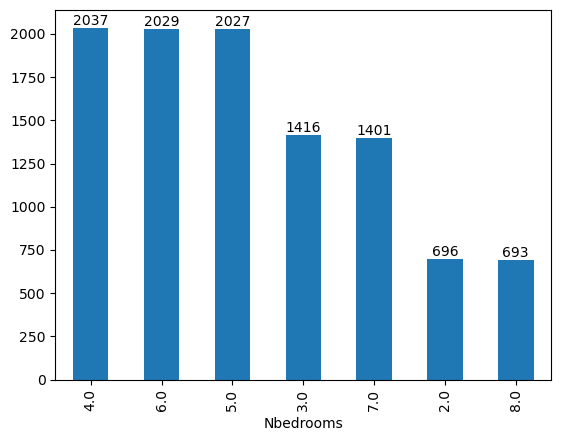

In [47]:
ax=combine_df.Nbedrooms.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: title={'center': 'Number Of washrooms for Bedrooms'}, ylabel='count'>

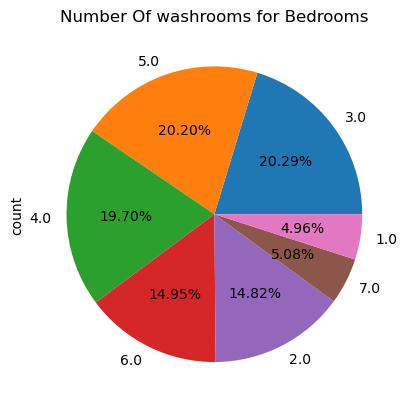

In [48]:
plt.title('Number Of washrooms for Bedrooms')
combine_df.Nbwashrooms.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [49]:
pd.crosstab(combine_df.roof,combine_df.Grade)

Grade,A,B,C,D,E,Missing
roof,,,,,,
NO,206,790,1739,1447,26,1993
YES,236,685,1189,682,0,1306


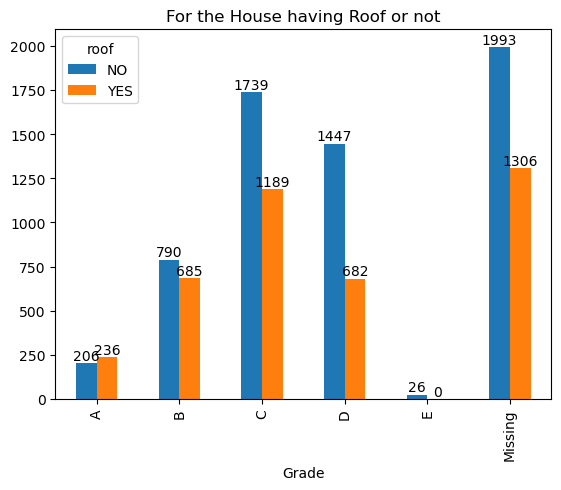

In [50]:
ax=pd.crosstab(combine_df.Grade,combine_df.roof).plot(kind='bar',title=('For the House having Roof or not'))
for i in ax.containers:
    ax.bar_label(i)

In [51]:
combine_df.EXPECTED.groupby(combine_df.Grade).mean()

Grade
A          4958.063348
B          4484.622373
C          4020.536202
D          3567.981212
E          3097.384615
Missing    4025.785693
Name: EXPECTED, dtype: float64

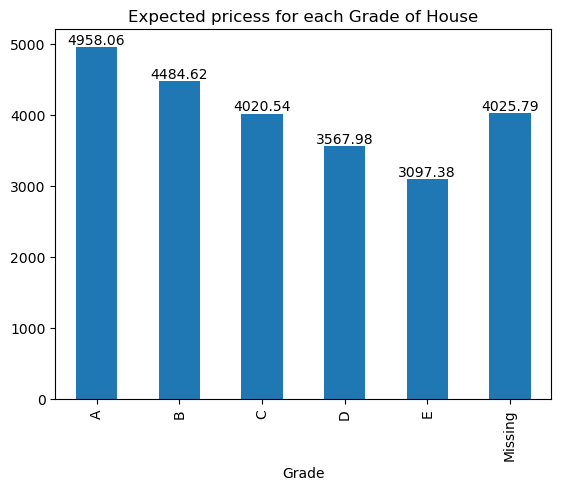

In [52]:
ax=combine_df.EXPECTED.groupby(combine_df.Grade).mean().plot(kind='bar',title='Expected pricess for each Grade of House')
for i in ax.containers:
    ax.bar_label(i)

# Hypothesis Testing

In [53]:
combine_df.Troom.groupby(combine_df.roof).mean()

roof
NO     7.014836
YES    6.983895
Name: Troom, dtype: float64

In [54]:
yes=combine_df[combine_df.roof=='YES']
no=combine_df[combine_df.roof=='NO']

In [55]:
from scipy.stats import ttest_ind

In [56]:
ttest_ind(yes.Troom,no.Troom,equal_var=False)
# since pvalue=0.26427411516915633 os greater than 0.05, Fail to reject null Hypothesi
# alternative hypothesis is true, there is no significance difference between average Troom and roof

TtestResult(statistic=-1.0827678730546693, pvalue=0.27894121708210945, df=8776.044537572)

In [57]:
combine_df.Nfloors.groupby(combine_df.roof).mean()

roof
NO     4.510563
YES    4.505857
Name: Nfloors, dtype: float64

In [58]:
ttest_ind(yes.Nfloors,no.Nfloors,equal_var=False)
# since pvalue=0.897512308975918 is greater than 0.05,fail to reject null hypothesis
# alternative hypothesis true,there is no significance dofference between average of Troom and Nfloors

TtestResult(statistic=-0.1288082761124077, pvalue=0.897512308975918, df=8774.130198530476)

In [59]:
from scipy.stats import chi2_contingency

In [60]:
chi2_contingency(pd.crosstab(combine_df.Grade,combine_df.roof))
# since pvalue=5.795534613231062e-27 is less than 0.05, reject null hypothesis
# There is no associatioon between average of Gradde and roof

Chi2ContingencyResult(statistic=132.89015878677472, pvalue=5.795534613231062e-27, dof=5, expected_freq=array([[ 266.12700262,  175.87299738],
       [ 888.09350422,  586.90649578],
       [1762.94086805, 1165.05913195],
       [1281.86513254,  847.13486746],
       [  15.65452957,   10.34547043],
       [1986.31896301, 1312.68103699]]))

<Figure size 3000x1500 with 0 Axes>

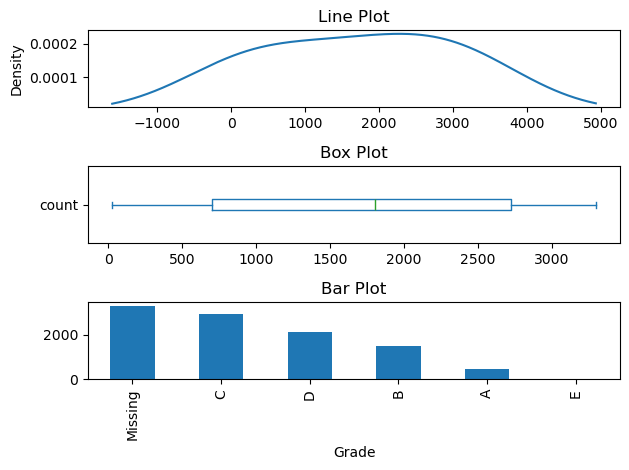

In [61]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)

combine_df.Grade.value_counts().plot(kind='kde',ax=ax[0])
combine_df.Grade.value_counts().plot(kind='box',vert=False,ax=ax[1])
combine_df.Grade.value_counts().plot(kind='bar',ax=ax[2])

# You can add titles or labels for each subplot if needed
ax[0].set_title('Line Plot')
ax[1].set_title('Box Plot')
ax[2].set_title('Bar Plot')

plt.tight_layout()  # Ensures the subplots are properly spaced
plt.show()

# Splitting the data into numeric columns and object columns

In [62]:
numcols=combine_df.select_dtypes(include=np.number)
objcols=combine_df.select_dtypes(include='object')

In [63]:
numcols.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,305,8.0,2.0,1.0,3.0,0.0,76.0,2,63.0,4,3826
1,344,6.0,7.0,7.0,8.0,0.0,83.0,7,97.0,1,4458
2,294,8.0,4.0,3.0,4.0,97.0,78.0,1,88.0,4,4199
3,328,5.0,4.0,2.0,4.0,0.0,91.0,5,86.0,1,3462
4,295,9.0,5.0,3.0,5.0,0.0,97.0,4,93.0,3,4543


In [64]:
objcols.head()

,roof,Grade
0,NO,D
1,NO,B
2,YES,C
3,NO,D
4,NO,C


# Label Encoding the object columns

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
objcols.roof=le.fit_transform(objcols.roof)

In [66]:
numcols.corr()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
Area(total),1.000000,-0.002568,-0.001139,0.012424,0.008010,0.004469,0.006177,0.011474,-0.013358,0.000818,0.216077
Troom,-0.002568,1.000000,0.005372,0.008300,0.010469,-0.009294,0.005893,0.004626,0.017554,-0.002570,0.433820
Nbedrooms,-0.001139,0.005372,1.000000,0.774888,0.818477,0.005539,0.017744,0.679858,0.005345,0.009498,0.600568
Nbwashrooms,0.012424,0.008300,0.774888,1.000000,0.948592,0.001063,0.015047,0.702911,-0.001419,0.011434,0.587657
Twashrooms,0.008010,0.010469,0.818477,0.948592,1.000000,-0.001042,0.017969,0.742157,-0.001513,0.013213,0.604139
Roof(Area),0.004469,-0.009294,0.005539,0.001063,-0.001042,1.000000,0.015228,-0.001603,0.005148,-0.002222,0.128261
Lawn(Area),0.006177,0.005893,0.017744,0.015047,0.017969,0.015228,1.000000,0.022981,-0.007112,0.000997,0.068758
Nfloors,0.011474,0.004626,0.679858,0.702911,0.742157,-0.001603,0.022981,1.000000,0.002702,0.008982,0.575612
API,-0.013358,0.017554,0.005345,-0.001419,-0.001513,0.005148,-0.007112,0.002702,1.000000,0.012268,0.112338
ANB,0.000818,-0.002570,0.009498,0.011434,0.013213,-0.002222,0.000997,0.008982,0.012268,1.000000,0.028895


<Axes: >

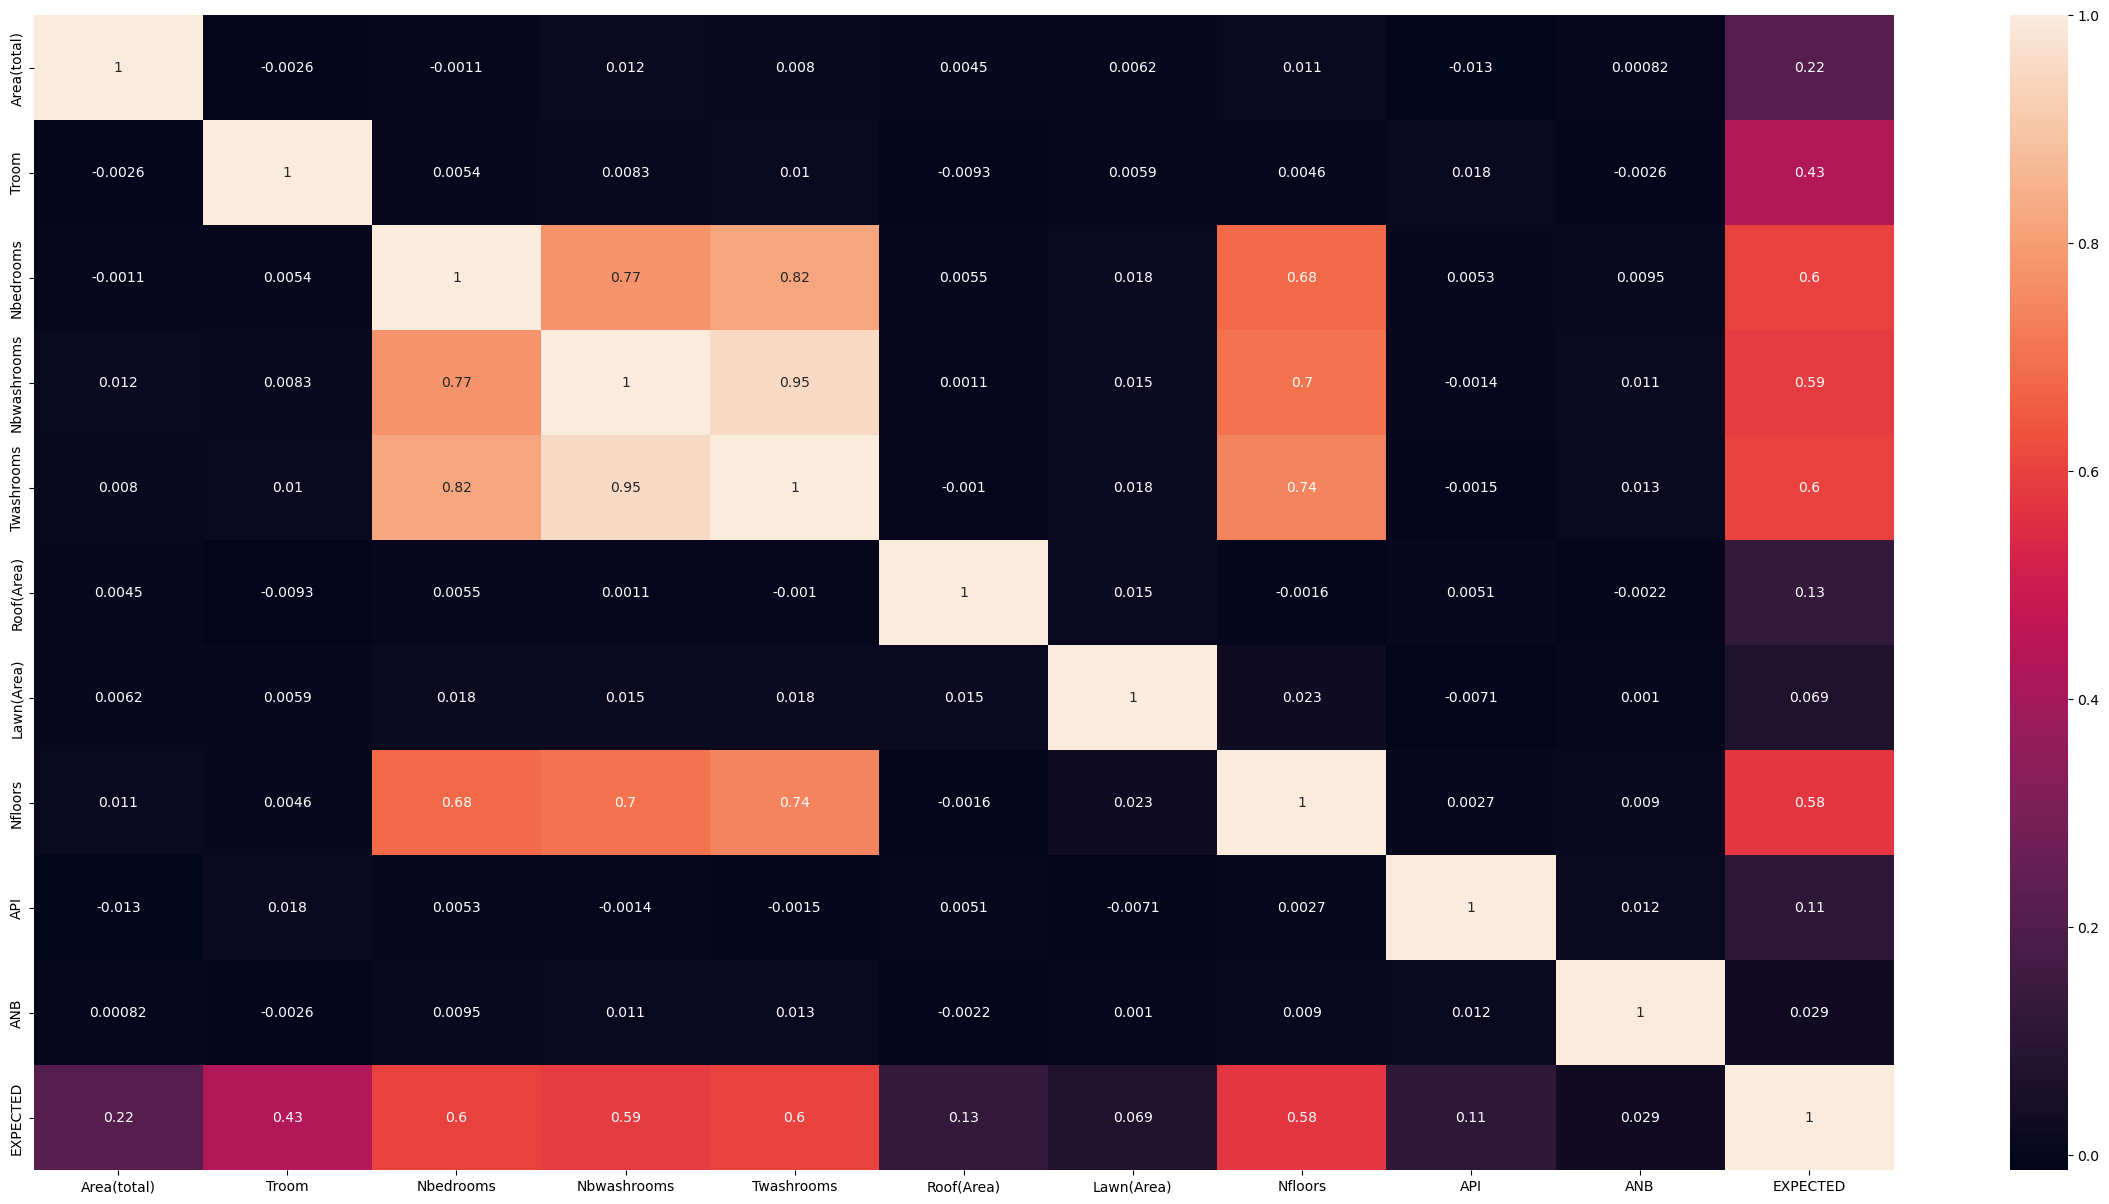

In [67]:
plt.figure(figsize=(30,15))
sns.heatmap(numcols.corr(),annot=True)

In [68]:
numcols=numcols.drop('Twashrooms',axis=1)

In [69]:
numcols.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,305,8.0,2.0,1.0,0.0,76.0,2,63.0,4,3826
1,344,6.0,7.0,7.0,0.0,83.0,7,97.0,1,4458
2,294,8.0,4.0,3.0,97.0,78.0,1,88.0,4,4199
3,328,5.0,4.0,2.0,0.0,91.0,5,86.0,1,3462
4,295,9.0,5.0,3.0,0.0,97.0,4,93.0,3,4543


# Standard Scaler

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc=StandardScaler()

In [72]:
numcols_scaled=sc.fit_transform(numcols)

In [73]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [74]:
numcols_scaled.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,-0.976671,0.702599,-1.822064,-1.900970,-0.797958,-1.185348,-1.382224,-1.354072,0.297617,-0.419853
1,0.927560,-0.706156,1.219336,1.894337,-0.797958,-0.593228,1.372648,1.518120,-1.468029,0.861792
2,-1.513762,0.702599,-0.605504,-0.635868,1.237577,-1.016171,-1.933198,0.757834,0.297617,0.336561
3,0.146337,-1.410533,-0.605504,-1.268419,-0.797958,0.083480,0.270699,0.588881,-1.468029,-1.158016
4,-1.464936,1.406977,0.002776,-0.635868,-0.797958,0.591011,-0.280275,1.180215,-0.290931,1.034165


<Axes: >

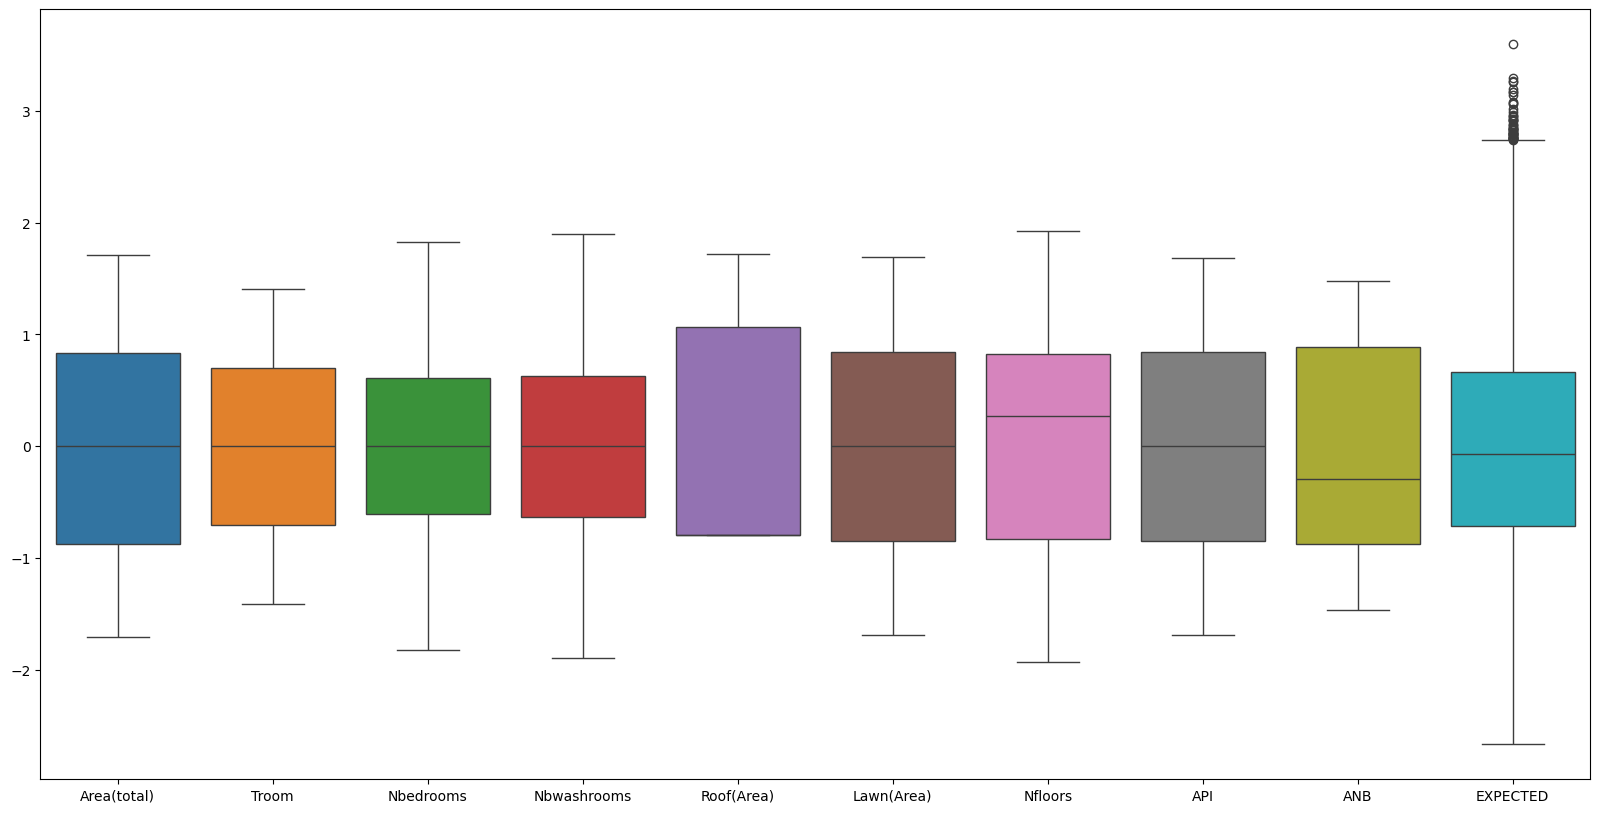

In [75]:
plt.figure(figsize=(20,10))
sns.boxplot(numcols_scaled)

# Minmax Scaler

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
mm=MinMaxScaler()

In [78]:
numcols_mm=mm.fit_transform(numcols)

In [79]:
numcols_mm=pd.DataFrame(numcols_mm,columns=numcols.columns)

In [80]:
numcols_mm.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,0.214286,0.75,0.000000,0.000000,0.000000,0.150,0.142857,0.100,0.6,0.359016
1,0.771429,0.25,0.833333,1.000000,0.000000,0.325,0.857143,0.950,0.0,0.563613
2,0.057143,0.75,0.333333,0.333333,0.808333,0.200,0.000000,0.725,0.6,0.479767
3,0.542857,0.00,0.333333,0.166667,0.000000,0.525,0.571429,0.675,0.0,0.241178
4,0.071429,1.00,0.500000,0.333333,0.000000,0.675,0.428571,0.850,0.4,0.591130


<Axes: >

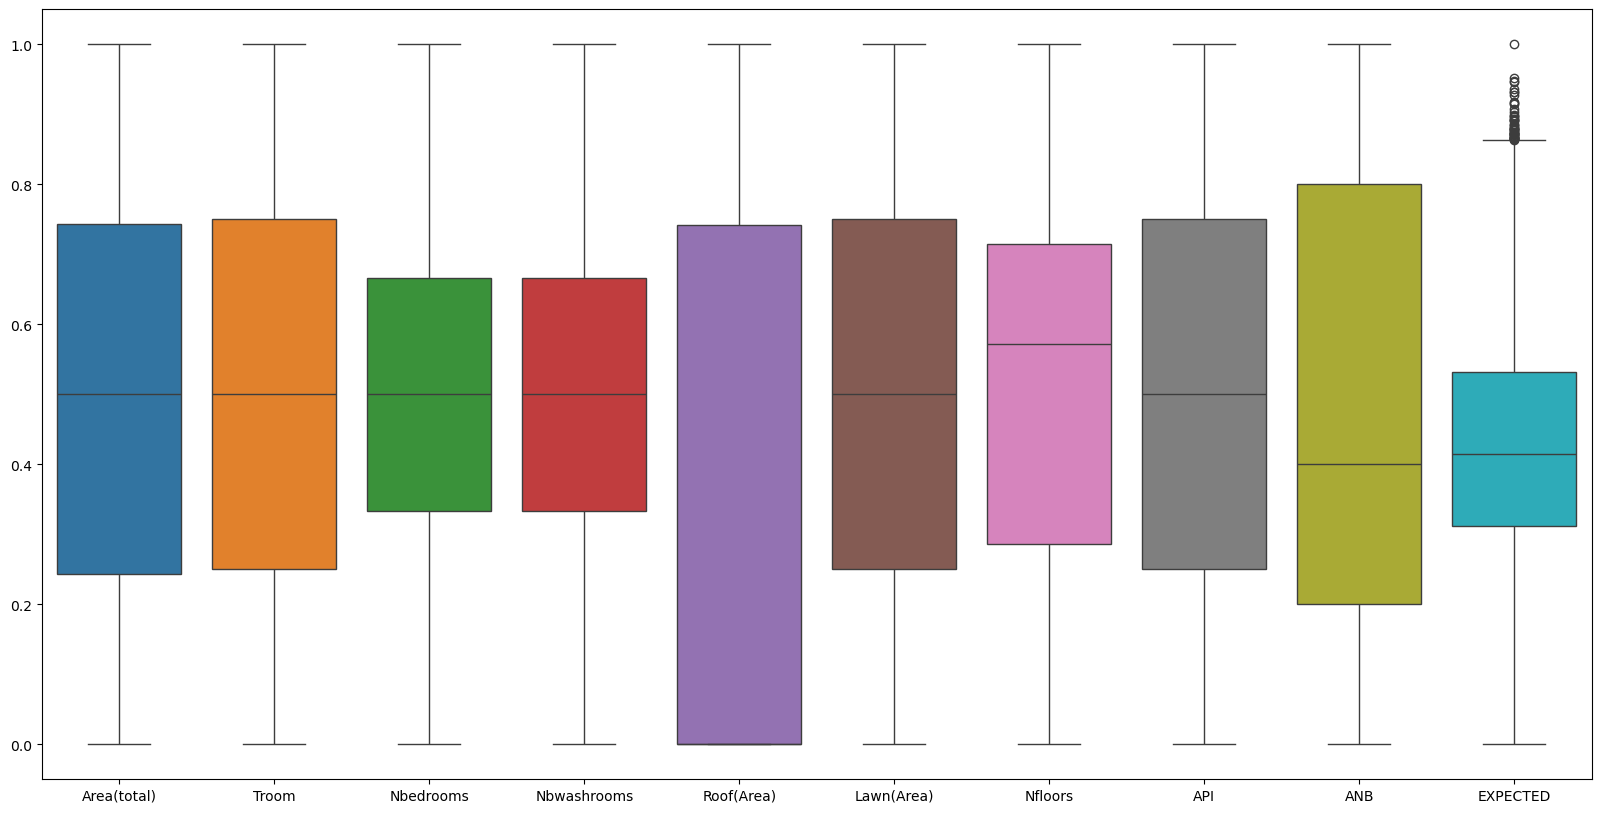

In [81]:
plt.figure(figsize=(20,10))
sns.boxplot(numcols_mm)

# Robust scaler

In [82]:
from sklearn.preprocessing import RobustScaler

In [83]:
robust=RobustScaler()

In [84]:
numcols_robust=robust.fit_transform(numcols)

In [85]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [86]:
numcols_robust.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,-0.571429,0.5,-1.5,-1.5,0.000000,-0.70,-1.000000,-0.80,0.333333,-0.253852
1,0.542857,-0.5,1.0,1.5,0.000000,-0.35,0.666667,0.90,-0.666667,0.673514
2,-0.885714,0.5,-0.5,-0.5,1.089888,-0.60,-1.333333,0.45,0.333333,0.293470
3,0.085714,-1.0,-0.5,-1.0,0.000000,0.05,0.000000,0.35,-0.666667,-0.787968
4,-0.857143,1.0,0.0,-0.5,0.000000,0.35,-0.333333,0.70,0.000000,0.798239


<Axes: >

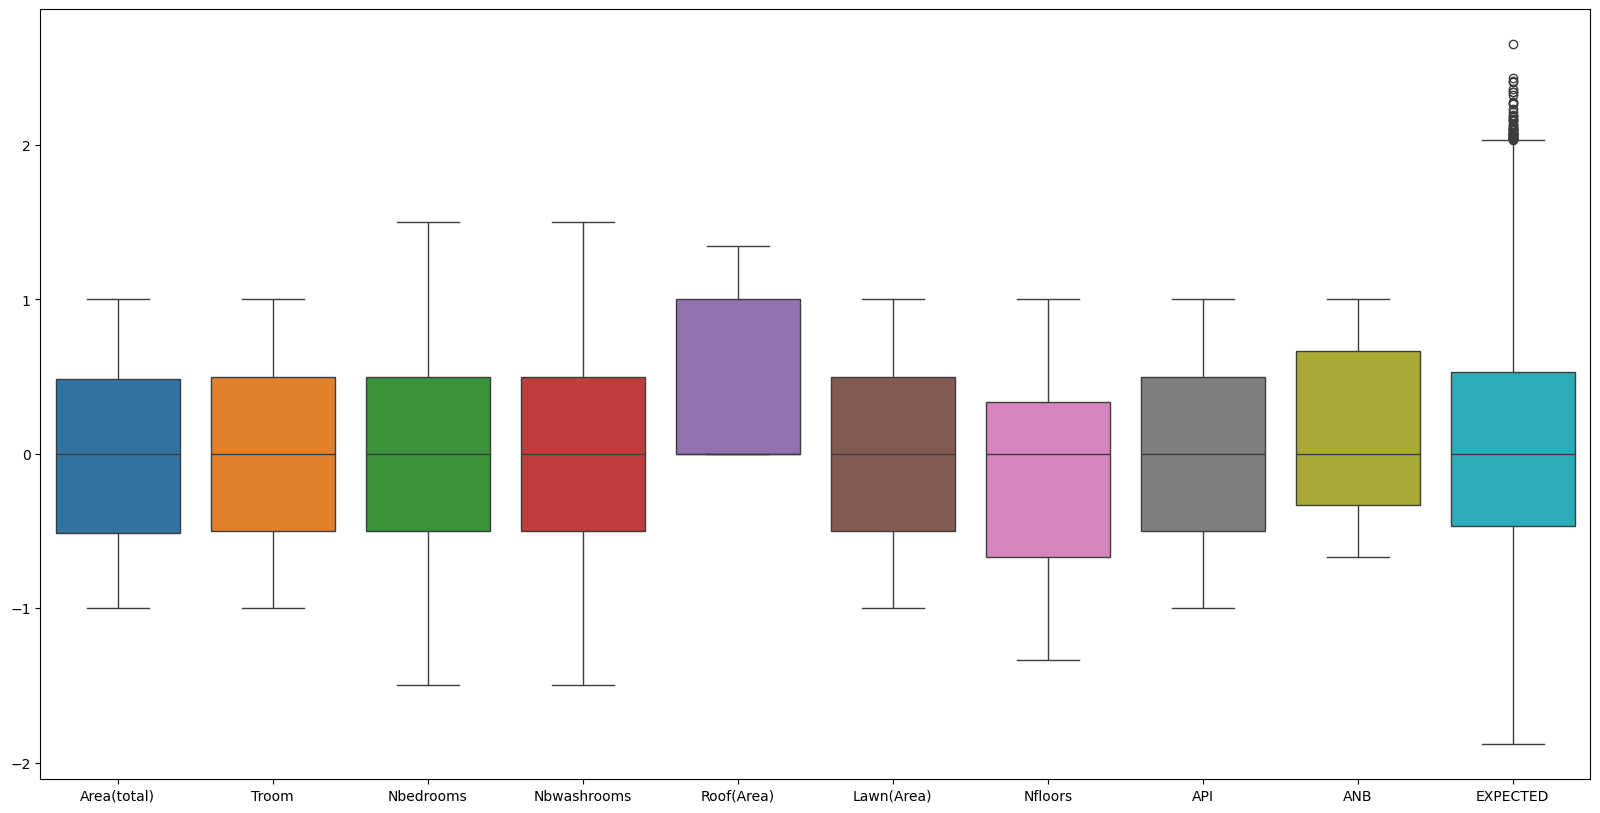

In [87]:
plt.figure(figsize=(20,10))
sns.boxplot(numcols_robust)

In [88]:
numcols_mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  10299 non-null  float64
 1   Troom        10299 non-null  float64
 2   Nbedrooms    10299 non-null  float64
 3   Nbwashrooms  10299 non-null  float64
 4   Roof(Area)   10299 non-null  float64
 5   Lawn(Area)   10299 non-null  float64
 6   Nfloors      10299 non-null  float64
 7   API          10299 non-null  float64
 8   ANB          10299 non-null  float64
 9   EXPECTED     10299 non-null  float64
dtypes: float64(10)
memory usage: 804.7 KB


In [89]:
clean=pd.concat([numcols_mm,objcols],axis=1)
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  10299 non-null  float64
 1   Troom        10299 non-null  float64
 2   Nbedrooms    10299 non-null  float64
 3   Nbwashrooms  10299 non-null  float64
 4   Roof(Area)   10299 non-null  float64
 5   Lawn(Area)   10299 non-null  float64
 6   Nfloors      10299 non-null  float64
 7   API          10299 non-null  float64
 8   ANB          10299 non-null  float64
 9   EXPECTED     10299 non-null  float64
 10  roof         10299 non-null  int32  
 11  Grade        10299 non-null  object 
dtypes: float64(10), int32(1), object(1)
memory usage: 925.4+ KB


In [90]:
clean.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,roof,Grade
0,0.214286,0.75,0.000000,0.000000,0.000000,0.150,0.142857,0.100,0.6,0.359016,0,D
1,0.771429,0.25,0.833333,1.000000,0.000000,0.325,0.857143,0.950,0.0,0.563613,0,B
2,0.057143,0.75,0.333333,0.333333,0.808333,0.200,0.000000,0.725,0.6,0.479767,1,C
3,0.542857,0.00,0.333333,0.166667,0.000000,0.525,0.571429,0.675,0.0,0.241178,0,D
4,0.071429,1.00,0.500000,0.333333,0.000000,0.675,0.428571,0.850,0.4,0.591130,0,C


In [91]:
house_tr=clean[clean.Grade!='Missing']
house_tt=clean[clean.Grade=='Missing']

In [92]:
house_tr.tail()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,roof,Grade
6995,0.228571,0.75,0.000000,0.000000,0.000000,0.200,0.000000,0.350,0.8,0.323729,0,D
6996,0.728571,0.00,0.166667,0.166667,0.833333,0.050,0.428571,0.425,0.6,0.201360,1,D
6997,0.228571,0.25,0.333333,0.166667,0.691667,0.250,0.428571,0.925,0.6,0.359987,1,D
6998,0.685714,0.75,0.833333,0.833333,0.000000,0.625,0.428571,0.625,0.0,0.573325,0,B
6999,0.342857,0.00,0.666667,0.500000,0.908333,0.250,0.428571,0.925,0.2,0.226934,1,C


In [93]:
house_tt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 7000 to 10298
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  3299 non-null   float64
 1   Troom        3299 non-null   float64
 2   Nbedrooms    3299 non-null   float64
 3   Nbwashrooms  3299 non-null   float64
 4   Roof(Area)   3299 non-null   float64
 5   Lawn(Area)   3299 non-null   float64
 6   Nfloors      3299 non-null   float64
 7   API          3299 non-null   float64
 8   ANB          3299 non-null   float64
 9   EXPECTED     3299 non-null   float64
 10  roof         3299 non-null   int32  
 11  Grade        3299 non-null   object 
dtypes: float64(10), int32(1), object(1)
memory usage: 322.2+ KB


In [94]:
house_tt=house_tt.drop('Grade',axis=1)
house_tt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 7000 to 10298
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  3299 non-null   float64
 1   Troom        3299 non-null   float64
 2   Nbedrooms    3299 non-null   float64
 3   Nbwashrooms  3299 non-null   float64
 4   Roof(Area)   3299 non-null   float64
 5   Lawn(Area)   3299 non-null   float64
 6   Nfloors      3299 non-null   float64
 7   API          3299 non-null   float64
 8   ANB          3299 non-null   float64
 9   EXPECTED     3299 non-null   float64
 10  roof         3299 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 296.4 KB


# Label Encoding for dependent variable

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
le=LabelEncoder()

In [97]:
house_tr.Grade=le.fit_transform(house_tr.Grade)

In [98]:
house_tr.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,roof,Grade
0,0.214286,0.75,0.000000,0.000000,0.000000,0.150,0.142857,0.100,0.6,0.359016,0,3
1,0.771429,0.25,0.833333,1.000000,0.000000,0.325,0.857143,0.950,0.0,0.563613,0,1
2,0.057143,0.75,0.333333,0.333333,0.808333,0.200,0.000000,0.725,0.6,0.479767,1,2
3,0.542857,0.00,0.333333,0.166667,0.000000,0.525,0.571429,0.675,0.0,0.241178,0,3
4,0.071429,1.00,0.500000,0.333333,0.000000,0.675,0.428571,0.850,0.4,0.591130,0,2


# Splitting the data into Dependent(y) and Independent variables(X's)

In [99]:
X=house_tr.drop('Grade',axis=1)
y=house_tr.Grade

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  7000 non-null   float64
 1   Troom        7000 non-null   float64
 2   Nbedrooms    7000 non-null   float64
 3   Nbwashrooms  7000 non-null   float64
 4   Roof(Area)   7000 non-null   float64
 5   Lawn(Area)   7000 non-null   float64
 6   Nfloors      7000 non-null   float64
 7   API          7000 non-null   float64
 8   ANB          7000 non-null   float64
 9   EXPECTED     7000 non-null   float64
 10  roof         7000 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 628.9 KB


In [101]:
y.info()

<class 'pandas.core.series.Series'>
Index: 7000 entries, 0 to 6999
Series name: Grade
Non-Null Count  Dtype
--------------  -----
7000 non-null   int32
dtypes: int32(1)
memory usage: 82.0 KB


<Axes: xlabel='Grade'>

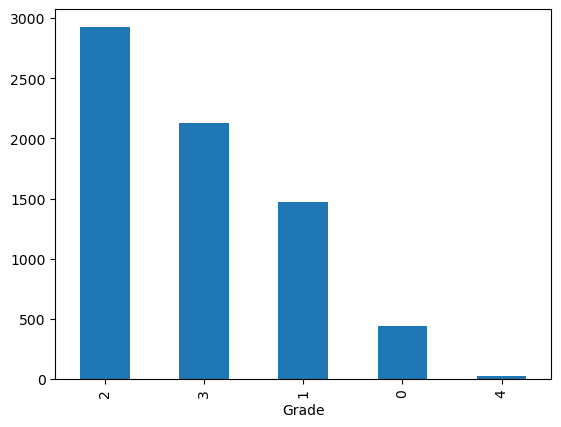

In [102]:
y.value_counts().plot(kind='bar')

# SMOTE

In [103]:
from imblearn.over_sampling import SMOTE # importing the smote as the data is been oversampled

In [104]:
oversample = SMOTE()

In [105]:
X_smote,y_smote = oversample.fit_resample(X, y)

# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
reg=LogisticRegression(max_iter=1000)

In [108]:
regmodel=reg.fit(X_smote,y_smote)

In [109]:
regmodel.score(X_smote,y_smote)

0.9096311475409836

In [110]:
repredict=regmodel.predict(X_smote)

In [111]:
pd.crosstab(y_smote,repredict)

col_0,0,1,2,3,4
Grade,,,,,
0,2831,97,0,0,0
1,207,2546,175,0,0
2,0,275,2407,246,0
3,0,0,230,2605,93
4,0,0,0,0,2928


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,RocCurveDisplay

In [113]:
cross_val_score(reg,X_smote,y_smote)

array([0.89822404, 0.89754098, 0.90368852, 0.91495902, 0.92178962])

In [114]:
np.mean([0.89685792, 0.89617486, 0.90539617, 0.9170082 , 0.90983607])

0.905054644

In [115]:
pd.crosstab(y_smote,repredict)

col_0,0,1,2,3,4
Grade,,,,,
0,2831,97,0,0,0
1,207,2546,175,0,0
2,0,275,2407,246,0
3,0,0,230,2605,93
4,0,0,0,0,2928


In [116]:
print(classification_report(y_smote,repredict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2928
           1       0.87      0.87      0.87      2928
           2       0.86      0.82      0.84      2928
           3       0.91      0.89      0.90      2928
           4       0.97      1.00      0.98      2928

    accuracy                           0.91     14640
   macro avg       0.91      0.91      0.91     14640
weighted avg       0.91      0.91      0.91     14640



In [117]:
predict_test=regmodel.predict(house_tt)

In [118]:
predict_test=pd.DataFrame(predict_test)

In [119]:
predict_test.value_counts()

0
2    1312
3    1006
1     720
0     216
4      45
Name: count, dtype: int64

In [120]:
predict_test=predict_test.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [121]:
predict_test.to_csv('regpred.csv')

# Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
tree=DecisionTreeClassifier(max_depth=10)

In [124]:
treemodel=tree.fit(X_smote,y_smote)

In [125]:
treemodel.score(X_smote,y_smote)

0.9432377049180328

In [126]:
treepredict=treemodel.predict(X_smote)

In [127]:
pd.crosstab(y_smote,treepredict)

col_0,0,1,2,3,4
Grade,,,,,
0,2825,102,1,0,0
1,107,2685,136,0,0
2,0,173,2626,129,0
3,0,0,152,2746,30
4,0,0,0,1,2927


In [128]:
cross_val_score(tree,X_smote,y_smote)

array([0.85177596, 0.85280055, 0.87807377, 0.90095628, 0.90403005])

In [129]:
np.mean([0.84836066, 0.85416667, 0.88080601, 0.9057377 , 0.89754098])

0.8773224040000001

In [130]:
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2928
           1       0.91      0.92      0.91      2928
           2       0.90      0.90      0.90      2928
           3       0.95      0.94      0.95      2928
           4       0.99      1.00      0.99      2928

    accuracy                           0.94     14640
   macro avg       0.94      0.94      0.94     14640
weighted avg       0.94      0.94      0.94     14640



In [131]:
tree_testpredict=treemodel.predict(house_tt)

In [132]:
tree_testpredict=pd.DataFrame(tree_testpredict)

In [133]:
tree_testpredict.value_counts()

0
2    1333
3    1023
1     749
0     174
4      20
Name: count, dtype: int64

In [134]:
tree_testpredict=tree_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [135]:
tree_testpredict.to_csv('tree.csv')

# Random forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf=RandomForestClassifier(max_depth=8,n_estimators=150)

In [138]:
rfmodel=rf.fit(X_smote,y_smote)

In [139]:
rfmodel.score(X_smote,y_smote)

0.9270491803278689

In [140]:
rfpredict=rfmodel.predict(X_smote)

In [141]:
pd.crosstab(y_smote,rfpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,2832,96,0,0,0
1,153,2626,149,0,0
2,0,224,2494,210,0
3,0,0,207,2694,27
4,0,0,0,2,2926


In [142]:
cross_val_score(rf,X_smote,y_smote)

array([0.87568306, 0.89617486, 0.91051913, 0.92486339, 0.92930328])

In [143]:
np.mean([0.835     , 0.82785714, 0.825     , 0.85571429, 0.85571429])

0.839857144

In [144]:
print(classification_report(y_smote,rfpredict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2928
           1       0.89      0.90      0.89      2928
           2       0.88      0.85      0.86      2928
           3       0.93      0.92      0.92      2928
           4       0.99      1.00      1.00      2928

    accuracy                           0.93     14640
   macro avg       0.93      0.93      0.93     14640
weighted avg       0.93      0.93      0.93     14640



In [145]:
rf_testpredict=rfmodel.predict(house_tt)

In [146]:
rf_testpredict=pd.DataFrame(rf_testpredict)

In [147]:
rf_testpredict.value_counts()

0
2    1348
3    1030
1     715
0     192
4      14
Name: count, dtype: int64

In [148]:
rf_testpredict=rf_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [149]:
rf_testpredict.to_csv('rf_test.csv')

# GBM

In [150]:
from sklearn.ensemble import GradientBoostingClassifier

In [208]:
gbm=GradientBoostingClassifier(max_depth=3,n_estimators=170)

In [209]:
gbmmodel=gbm.fit(X_smote,y_smote)

In [210]:
gbmmodel.score(X_smote,y_smote)

0.9634562841530054

In [211]:
gbmpredict=gbm.predict(X_smote)

In [212]:
pd.crosstab(y_smote,gbmpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,2891,37,0,0,0
1,44,2784,100,0,0
2,0,108,2706,114,0
3,0,0,130,2797,1
4,0,0,0,1,2927


In [156]:
cross_val_score(gbm,X_smote,y_smote)

array([0.87431694, 0.88319672, 0.90778689, 0.92418033, 0.92759563])

In [157]:
np.mean([0.89      , 0.89142857, 0.86714286, 0.88071429, 0.88142857])

0.8821428579999999

In [158]:
print(classification_report(y_smote,gbmpredict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2928
           1       0.87      0.89      0.88      2928
           2       0.85      0.84      0.84      2928
           3       0.92      0.91      0.91      2928
           4       0.99      1.00      0.99      2928

    accuracy                           0.92     14640
   macro avg       0.92      0.92      0.92     14640
weighted avg       0.92      0.92      0.92     14640



In [159]:
gbm_testpredict=gbmmodel.predict(house_tt)

In [160]:
gbm_testpredict=pd.DataFrame(gbm_testpredict)

In [161]:
gbm_testpredict.value_counts()

0
2    1335
3    1035
1     732
0     176
4      21
Name: count, dtype: int64

In [162]:
gbm_testpredict=gbm_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [163]:
gbm_testpredict.to_csv('gbm.csv')

# SVC

In [164]:
from sklearn.svm import SVC

In [165]:
svc=SVC(C=5)

In [166]:
svcmodel=svc.fit(X_smote,y_smote)

In [167]:
svcmodel.score(X_smote,y_smote)

0.9610655737704918

In [168]:
svcpredict=svc.predict(X_smote)

In [170]:
pd.crosstab(y_smote,svcpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,2919,9,0,0,0
1,83,2745,100,0,0
2,0,131,2661,136,0
3,0,0,87,2817,24
4,0,0,0,0,2928


In [171]:
cross_val_score(svc,X_smote,y_smote)

array([0.9443306 , 0.93613388, 0.94057377, 0.95525956, 0.9614071 ])

In [172]:
np.mean([0.9       , 0.90428571, 0.88785714, 0.89428571, 0.89642857])

0.8965714260000001

In [173]:
print(classification_report(y_smote,svcpredict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2928
           1       0.95      0.94      0.94      2928
           2       0.93      0.91      0.92      2928
           3       0.95      0.96      0.96      2928
           4       0.99      1.00      1.00      2928

    accuracy                           0.96     14640
   macro avg       0.96      0.96      0.96     14640
weighted avg       0.96      0.96      0.96     14640



In [174]:
svc_testpredict=svc.predict(house_tt)

In [175]:
svc_testpredict=pd.DataFrame(svc_testpredict)

In [176]:
svc_testpredict.value_counts()

0
2    1334
3    1064
1     683
0     201
4      17
Name: count, dtype: int64

In [177]:
svc_testpredict=svc_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [178]:
svc_testpredict.to_csv('svc.csv')

# KNN

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
knc=KNeighborsClassifier(n_neighbors=2)

In [181]:
kncmodel=knc.fit(X_smote,y_smote)

In [182]:
kncmodel.score(X_smote,y_smote)

0.9629781420765028

In [183]:
kncpredict=kncmodel.predict(X_smote)

In [184]:
pd.crosstab(y_smote,kncpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,2928,0,0,0,0
1,48,2880,0,0,0
2,0,308,2620,0,0
3,0,0,186,2742,0
4,0,0,0,0,2928


In [185]:
cross_val_score(knc,X_smote,y_smote)

array([0.88900273, 0.88695355, 0.9023224 , 0.90983607, 0.93203552])

In [186]:
np.mean([0.74714286, 0.76285714, 0.75857143, 0.76357143, 0.74857143])

0.7561428580000001

In [187]:
print(classification_report(y_smote,kncpredict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2928
           1       0.90      0.98      0.94      2928
           2       0.93      0.89      0.91      2928
           3       1.00      0.94      0.97      2928
           4       1.00      1.00      1.00      2928

    accuracy                           0.96     14640
   macro avg       0.96      0.96      0.96     14640
weighted avg       0.96      0.96      0.96     14640



In [188]:
kncpredict_test=knc.predict(house_tt)

In [189]:
kncpredict_test=pd.DataFrame(kncpredict_test)

In [190]:
kncpredict_test.value_counts()

0
2    1306
3     896
1     828
0     254
4      15
Name: count, dtype: int64

In [191]:
kncpredict_test=kncpredict_test.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [192]:
kncpredict_test.to_csv('knc.csv')

# GaussianNB

In [193]:
from sklearn.naive_bayes import GaussianNB

In [194]:
gb=GaussianNB()

In [195]:
gbmodel=gb.fit(X_smote,y_smote)

In [196]:
gbmodel.score(X_smote,y_smote)

0.807103825136612

In [197]:
gbpredict=gbmodel.predict(X_smote)

In [198]:
pd.crosstab(y_smote,gbpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,2708,220,0,0,0
1,371,2243,314,0,0
2,0,582,2013,331,2
3,0,1,372,1924,631
4,0,0,0,0,2928


In [199]:
cross_val_score(gb,X_smote,y_smote)

array([0.78483607, 0.79747268, 0.80088798, 0.82889344, 0.82069672])

In [200]:
np.mean([0.63214286, 0.665     , 0.63785714, 0.65357143, 0.67642857])

0.653

In [201]:
print(classification_report(y_smote,gbpredict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2928
           1       0.74      0.77      0.75      2928
           2       0.75      0.69      0.72      2928
           3       0.85      0.66      0.74      2928
           4       0.82      1.00      0.90      2928

    accuracy                           0.81     14640
   macro avg       0.81      0.81      0.80     14640
weighted avg       0.81      0.81      0.80     14640



In [202]:
gb_testpredict=gb.predict(house_tt)

In [203]:
gb_testpredict=pd.DataFrame(gb_testpredict)

In [204]:
gb_testpredict.value_counts()

0
2    1207
3     824
1     801
0     244
4     223
Name: count, dtype: int64

In [205]:
gb_testpredict=gb_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [206]:
gb_testpredict.value_counts()

0
C    1207
D     824
B     801
A     244
E     223
Name: count, dtype: int64

In [207]:
gb_testpredict.to_csv('gb.csv')

# Accuracies for different machine learning models:

| Model Name | Accuracy |
|--|--|
| Logistic Regression | 0.9096311475409836 | 
| Decision Tree | 0.9432377049180328 |
| Random Forest | 0.9270491803278689 |
| Gradient Boosting Machine| 0.9634562841530054 |
| Support Vector Machine | 0.9610655737704918 |
| k-nearest neighbors | 0.9629781420765028 |
| Naive Bayes | 0.807103825136612 |

## The summary of model accuracies from highest to lowest is as follows:

| Model Name | Accuracy |
|--|--|
| Gradient Boosting Machine |0.9634562841530054|
| k-nearest neighbors | 0.9629781420765028 |
| SupportVector Machine | 0.9610655737704918 |
| Decision Tree | 0.9432377049180328 |
| Random Forest | 0.9270491803278689 |
| Logistic Regression | 0.9096311475409836 |
| Naive Bayes | 0.807103825136612 |

# Based on the provided accuracies, 
## the best fit model:
the best fit model would be **Gradient Boosting** with an accuracy of **0.9634562841530054**. This model has the highest accuracy among the ones listed. Gradient Boosting is known for its ability to produce highly accurate predictions by combining the outputs of multiple weak learners (often decision trees) to improve overall predictive performance.